In [1]:
import os
from huggingface_hub import hf_hub_download
from easy_ViTPose import VitInference
import numpy as np
import cv2
from utils import draw_keypoints, path_keypoints, path_frames
from matplotlib import pyplot as plt

/media/disk1/gdibenedetto/test_env_easy_ViTPose/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MODEL_SIZE = "h"  # @param ['s', 'b', 'l', 'h']
YOLO_SIZE = "n"  # @param ['s', 'n']
DATASET = "coco_25"  # @param ['coco_25', 'coco', 'wholebody', 'mpii', 'aic', 'ap10k', 'apt36k']
ext = ".pth"
ext_yolo = ".pt"
SEPARATOR = os.sep

MODEL_TYPE = "torch"
YOLO_TYPE = "torch"
REPO_ID = "JunkyByte/easy_ViTPose"
FILENAME = (
    os.path.join(MODEL_TYPE, f"{DATASET}/vitpose-" + MODEL_SIZE + f"-{DATASET}") + ext
)
FILENAME_YOLO = "yolov8/yolov8" + YOLO_SIZE + ext_yolo

print(f"Downloading model {REPO_ID}/{FILENAME}")
model_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)
yolo_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME_YOLO)

In [3]:
model = VitInference(
    model_path,
    yolo_path,
    MODEL_SIZE,
    det_class="human",
    dataset=DATASET,
    yolo_size=320,
    is_video=True,
    single_pose=True,
)

# Load image and run inference
model_config = f"vitpose-{MODEL_SIZE}-{DATASET}-yolov8{YOLO_SIZE}"

In [4]:
if not os.path.exists(path_keypoints):
    os.makedirs(path_keypoints)

In [5]:
list_files = [
    os.path.join(dp, f)
    for dp, dn, fn in os.walk(os.path.expanduser(path_frames))
    for f in fn
]
list_files = [f"{file}" for file in list_files if file.endswith(".jpg")]

In [6]:
def extract_keypoint(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(img_path)
    keypoints = model.inference(img)

    if keypoints == {}:
        print(f"No keypoints found in {img_path}")

    keypoints = keypoints[0]
    temp_path = img_path.split(SEPARATOR)[1:]
    path_to_save = os.path.join(path_keypoints, temp_path[-1] + ".npy")
    np.save(
        path_to_save,
        keypoints,
        allow_pickle=True,
    )
    return keypoints

1
2
test


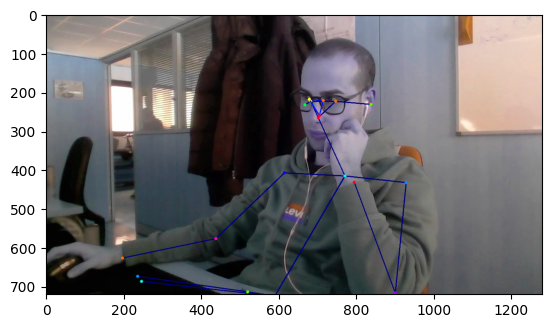

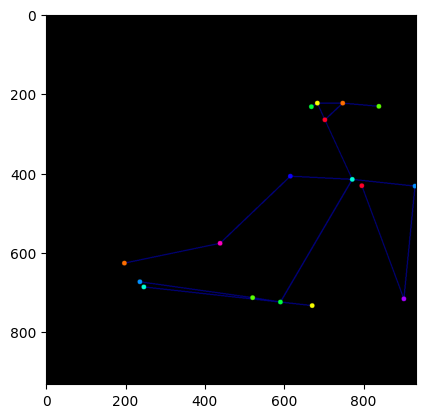

In [7]:
for frame in list_files:
    keypoints = extract_keypoint(frame)

    img_and_keypoints = model.draw(show_yolo=False)
    img_and_keypoints_path = "img_and_keypoints_" + frame.split(SEPARATOR)[-1]
    plt.imshow(img_and_keypoints)
    plt.show()

    keypoints_only_path = "keypoints_only_" + frame.split(SEPARATOR)[-1]
    drawed_img = draw_keypoints(keypoints)
    plt.imshow(drawed_img)
    plt.show()
    break